,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Thumbnail
0,1.png,Color,PNG,3,0.70,967,601,C:\Users\Mbe\anaconda3\envs\LAB5\images2\1.png,
1,2.jpeg,Color,JPEG,3,0.05,718,750,C:\Users\Mbe\anaconda3\envs\LAB5\images2\2.jpeg,
2,2.PNG,Color,PNG,3,0.47,716,450,C:\Users\Mbe\anaconda3\envs\LAB5\images2\2.PNG,
3,3.jpg,Color,JPG,3,0.06,730,411,C:\Users\Mbe\anaconda3\envs\LAB5\images2\3.jpg,
4,4.jpg,Color,JPG,3,0.03,700,394,C:\Users\Mbe\anaconda3\envs\LAB5\images2\4.jpg,
5,5.jpg,Color,JPG,3,0.04,700,394,C:\Users\Mbe\anaconda3\envs\LAB5\images2\5.jpg,
6,6.jpg,Color,JPG,3,0.07,800,533,C:\Users\Mbe\anaconda3\envs\LAB5\images2\6.jpg,
7,8.PNG,Color,PNG,3,0.56,960,463,C:\Users\Mbe\anaconda3\envs\LAB5\images2\8.PNG,
8,9.PNG,Color,PNG,3,0.21,578,372,C:\Users\Mbe\anaconda3\envs\LAB5\images2\9.PNG,

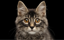
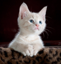
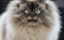
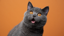
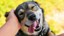
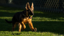
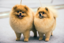
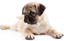

In [7]:
import os
import cv2
import pandas as pd
from PIL import Image
from io import BytesIO
import base64
import glob

def get_image_info(folder_path):
    # Data list to store image information
    data = []

    # Supported image formats
    image_formats = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')

    # Loop through each file in the folder
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        if file_path.lower().endswith(image_formats):
            # Load the image using OpenCV
            image = cv2.imread(file_path)
            
            if image is None:
                continue
            
            # Get image properties
            file_name = os.path.basename(file_path)
            color_model = 'Grayscale' if len(image.shape) == 2 else 'Color'
            file_format = file_path.split('.')[-1].upper()
            channels = image.shape[2] if len(image.shape) == 3 else 1
            file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)  # in MB
            width, height = image.shape[1], image.shape[0]
            full_path = os.path.abspath(file_path)

            # Create image thumbnail (Base64 for dataframe display)
            pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            pil_image.thumbnail((64, 64))
            buffered = BytesIO()
            pil_image.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()

            # Append image information to the list
            data.append({
                'File Name': file_name,
                'Color Model': color_model,
                'Format': file_format,
                'Channels': channels,
                'File Size (MB)': file_size,
                'Width': width,
                'Height': height,
                'Full Path': full_path,
                'Thumbnail': f'<img src="data:image/png;base64,{img_str}"/>'
            })

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    
    # Return the DataFrame
    return df

# Set the folder path
folder_path = 'images2'

# Call the function and display the results
df = get_image_info(folder_path)

# Display the dataframe with thumbnails in Jupyter
from IPython.display import display, HTML
display(HTML(df.to_html(escape=False)))

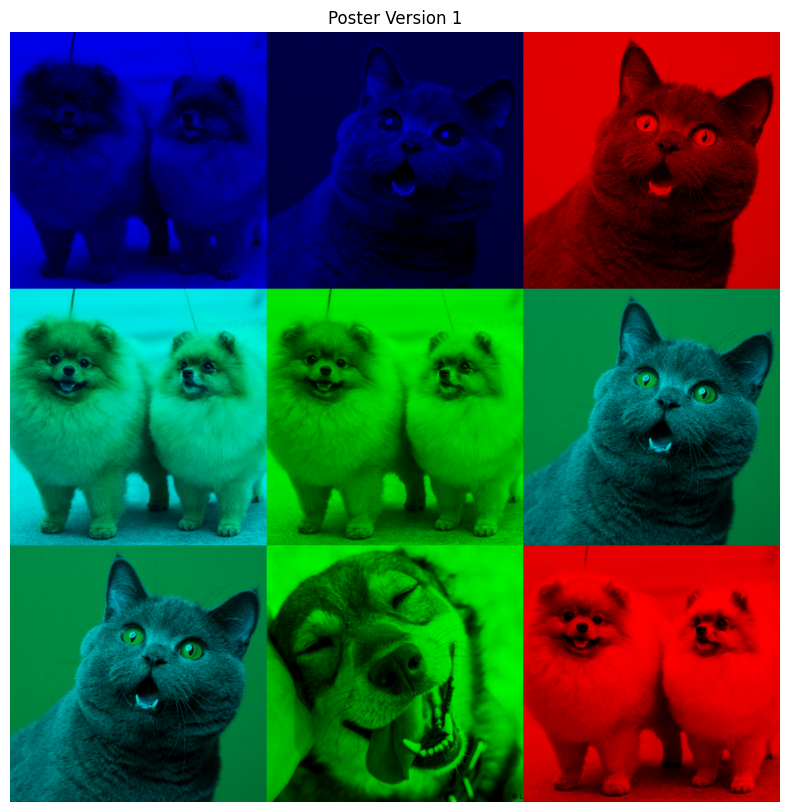

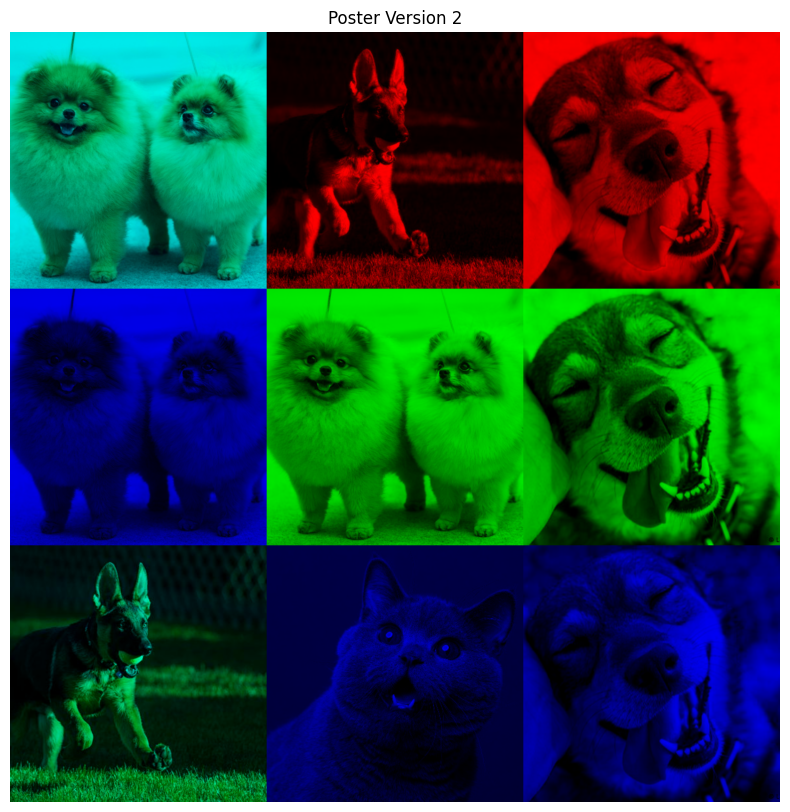

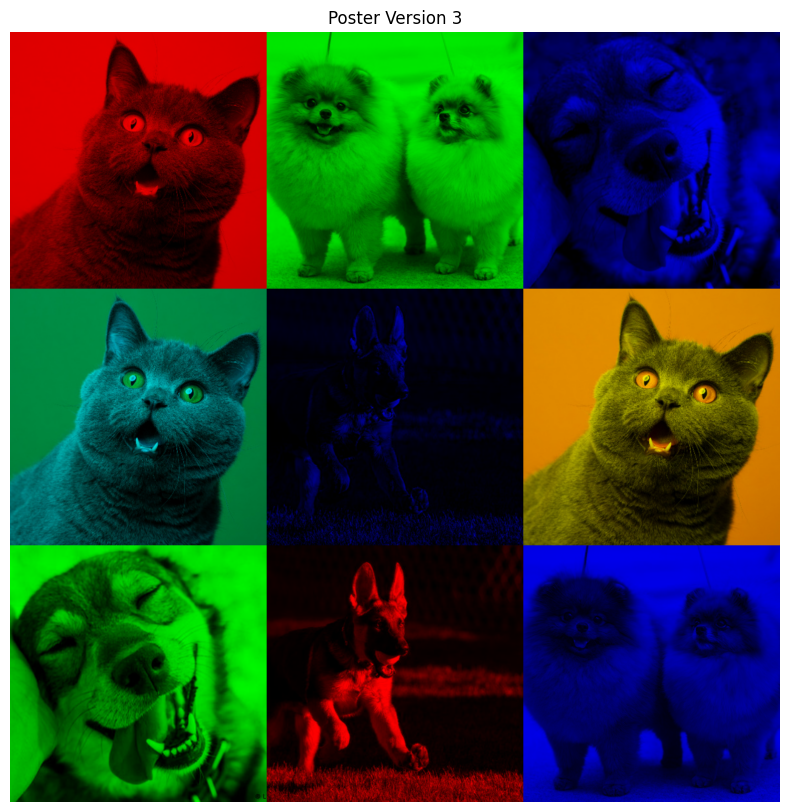

In [20]:
import cv2
import numpy as np
import os
import random
from glob import glob
import matplotlib.pyplot as plt

# Function to load, crop, and resize images
def load_and_resize_images(folder_path, img_size):
    images = []
    for file_path in glob(os.path.join(folder_path, "*.jpg")):
        img = cv2.imread(file_path)
        if img is not None:
            square_img = crop_to_square(img)
            resized_img = cv2.resize(square_img, (img_size, img_size))
            images.append(resized_img)
    return images

# Function to crop images to a square shape
def crop_to_square(img):
    height, width = img.shape[:2]
    side_length = min(height, width)
    center_y, center_x = height // 2, width // 2
    half_side = side_length // 2
    cropped_img = img[center_y - half_side:center_y + half_side, center_x - half_side:center_x + half_side]
    return cropped_img

# Function to apply a random color filter
def apply_random_color_filter(img):
    color_filters = [
        (1, 0, 0),  # Red
        (0, 1, 0),  # Green
        (0, 0, 1),  # Blue
        (1, 1, 0),  # Yellow
        (1, 0, 1),  # Magenta
        (0, 1, 1)   # Cyan
    ]
    b, g, r = cv2.split(img)
    filter_choice = random.choice(color_filters)
    filtered_img = cv2.merge((b * filter_choice[0], g * filter_choice[1], r * filter_choice[2]))
    return filtered_img

# Function to create a poster
def create_poster(images, cols, rows, img_size):
    poster_height = img_size * rows
    poster_width = img_size * cols
    poster = np.zeros((poster_height, poster_width, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            img = apply_random_color_filter(random.choice(images))
            x, y = j * img_size, i * img_size
            poster[y:y+img_size, x:x+img_size] = img

    return poster

# Function to generate multiple posters and display them
def generate_posters(folder_path, img_size=500, cols=3, rows=3, num_versions=3):
    images = load_and_resize_images(folder_path, img_size)

    posters = []
    for i in range(num_versions):
        poster = create_poster(images, cols, rows, img_size)
        posters.append(poster)
        
        # Display poster in Jupyter Notebook
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(poster, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Poster Version {i + 1}")
        plt.show()

# Usage Example
folder_path = "images2"  # Folder containing your images
generate_posters(folder_path)